In [1]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Data Importing

In [2]:
#importing all applicable libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.inspection import permutation_importance
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.24.1
Numpy version=1.20.1
Pandas version=1.2.4
Matplotlib version=3.3.4
Python version=3.8.8


In [3]:
#importing CSV file into the terminal

traindf = pd.read_csv('/Users/Yimin/Documents/SP/Applied Machine Learning/CA1/titanic/train.csv')
testdf = pd.read_csv('/Users/Yimin/Documents/SP/Applied Machine Learning/CA1/titanic/test.csv')

#Preview of train dataset provided by kaggle
traindf.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Summary of the features provided in the dataset

print("*****************************************************")
print("Summary of various features provided in the dataset")
print("*****************************************************")
print("PassengerId: ID as generated in sequence in the dataset")
print("Survived: Passengers whom survived = 1, Passengers whom did not survive = 0")
print("Pclass: Passenger class in 1, 2 or 3")
print("Name: Name of passenger")
print("Sex: Gender of passenger")
print("Age: Age of passenger")
print("SibSp: Number of siblings or spouse onboard with the passenger")
print("Parch: Number of parents or children onboard with the passenger")
print("Ticket: Ticket number")
print("Fare: Ticket fare paid by the passenger")
print("Cabin: Cabin number")
print("Embarked: Port embarked at - C, S or Q")

*****************************************************
Summary of various features provided in the dataset
*****************************************************
PassengerId: ID as generated in sequence in the dataset
Survived: Passengers whom survived = 1, Passengers whom did not survive = 0
Pclass: Passenger class in 1, 2 or 3
Name: Name of passenger
Sex: Gender of passenger
Age: Age of passenger
SibSp: Number of siblings or spouse onboard with the passenger
Parch: Number of parents or children onboard with the passenger
Ticket: Ticket number
Fare: Ticket fare paid by the passenger
Cabin: Cabin number
Embarked: Port embarked at - C, S or Q


# Exploratory Data Analysis

In [6]:
print(traindf.info())
print(traindf.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [7]:
print(testdf.info())
print(testdf.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


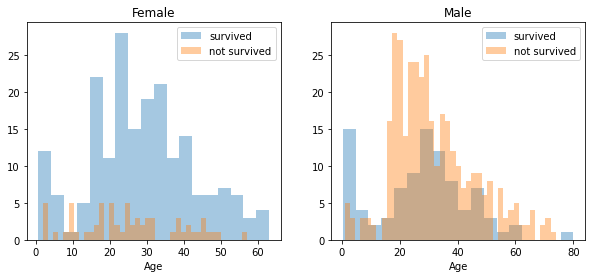

In [8]:
#Identifying features that could lead to a high chance of survival

#1. Age & Sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = traindf[traindf['Sex']=='female']
men = traindf[traindf['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#From the graphs below, it can be inferred that for the females, their survival rates are higher than non-survival rates, and vice versa for the males. 
#Most of the people whom survived seems to be of the younger age group - i.e. 50 and below.

Text(0, 0.5, '% Survived')

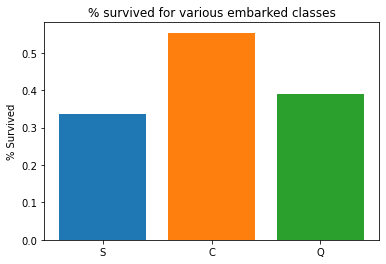

In [9]:
#2. Embarked
fig, ax = plt.subplots(figsize=(6,4))
embarked = traindf['Embarked'].value_counts(sort=False)

s_count = traindf.loc[traindf['Survived'] == 1, ['Embarked']].value_counts(sort=False)
#ns_count = traindf.loc[df['Survived'] == 0, ['Embarked']].value_counts(sort=False)

ax.bar('S', s_count['S']/embarked['S'])
ax.bar('C', s_count['C']/embarked['C'])
ax.bar('Q', s_count['Q']/embarked['Q'])

plt.title("% survived for various embarked classes")

ax.set_ylabel('% Survived')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


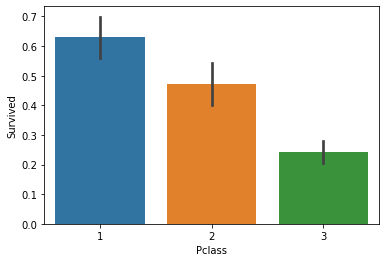

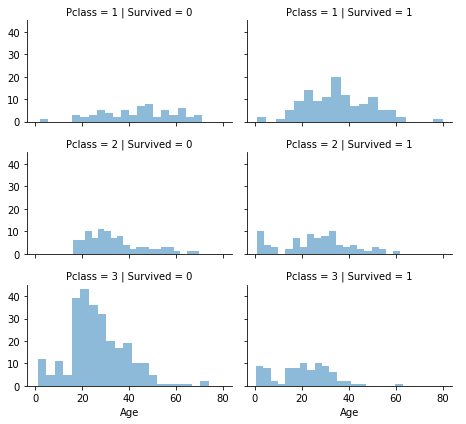

In [10]:
#3. Pclass
sns.barplot(x='Pclass', y='Survived', data=traindf)

grid = sns.FacetGrid(traindf, col='Survived', row='Pclass', size=2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#As seen from the graphs below, Pclass=1 had the highest survival rates, followed by Pclass=2 and Pclass=3. Most of the passengers whom did not survive in Pclass=3 were below 50 years old.

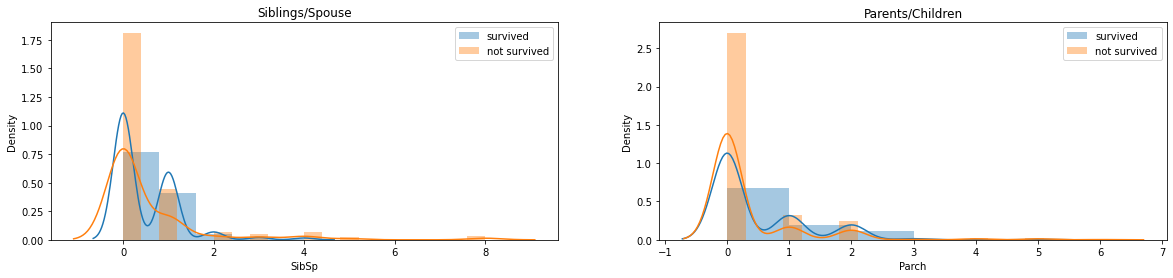

In [11]:
#4. Siblings/Spouse - SibSp & Parents/Children - Parch

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
ax = sns.distplot(traindf[traindf['Survived']==1].SibSp.dropna(), bins=5, label = survived, ax = axes[0])
ax = sns.distplot(traindf[traindf['Survived']==0].SibSp.dropna(), bins=20, label = not_survived, ax = axes[0])
ax.legend()
ax.set_title('Siblings/Spouse')
ax = sns.distplot(traindf[traindf['Survived']==1].Parch.dropna(), bins=5, label = survived, ax = axes[1])
ax = sns.distplot(traindf[traindf['Survived']==0].Parch.dropna(), bins=20, label = not_survived, ax = axes[1])
ax.legend()
_ = ax.set_title('Parents/Children')



#As can be seen from the data below, most of the people whom survived came with less than 3 siblings. A family of 8 Siblings/spouses did not survive
##Passengers with 0,1,2,3 parents/children had similar survival rates. It seems that survival rates were higher for these passengers in general.


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


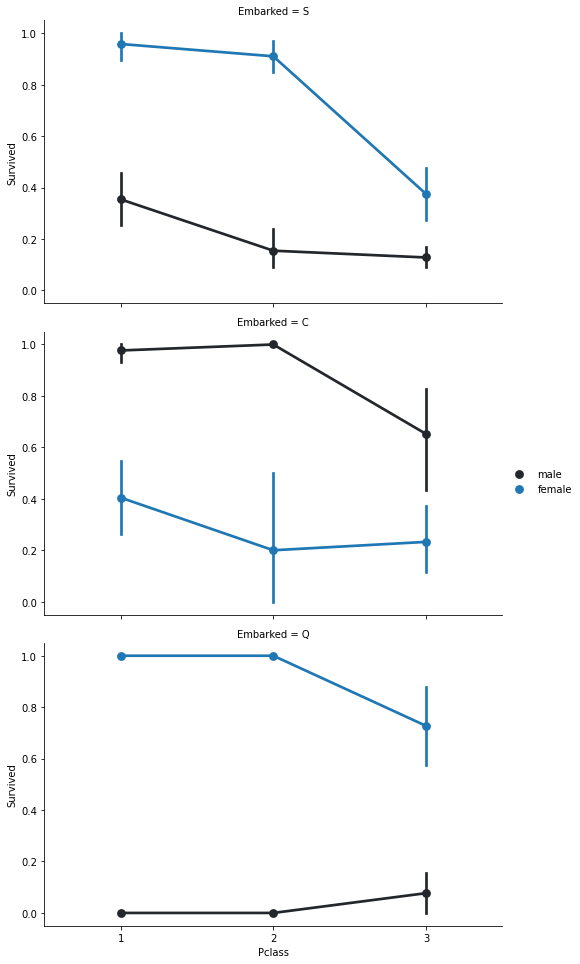

In [12]:
#5. Embarked, Pclass and sex

FacetGrid = sns.FacetGrid(traindf, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [13]:
#6. Since the Parch and SibSp seems to contribute to the survival rates, we will add a new feature called relatives, which combines both SibSp and Parch values, and also another column named not_alone - to determine if passengers on board came with SibSp/Parch or they were alone onboard.
data = [traindf, testdf]
for d in data:
    d['relatives'] = d['SibSp'] + d['Parch']
    d.loc[d['relatives'] > 0, 'not_alone'] = 0
    d.loc[d['relatives'] == 0, 'not_alone'] = 1
    d['not_alone'] = d['not_alone'].astype(int)
traindf['not_alone'].value_counts()



1    537
0    354
Name: not_alone, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


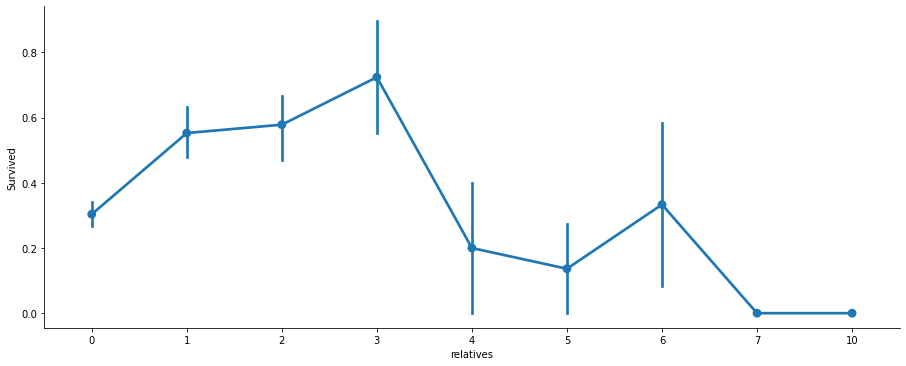

In [14]:
axes = sns.factorplot('relatives','Survived', data=traindf, aspect = 2.5, )


# Data Preparation

In [15]:
#drop cabin column as it has too many null values
train_data = traindf.drop(columns='Cabin', axis=1)
test_data = testdf.drop(columns='Cabin', axis=1)

#Replacing the missing values in the “Age” column with the mean value
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

#Replacing the missing values in the “Embarked” column with mode value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

#Converting integer type values into categorical columns
train_data1=train_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
test_data1=test_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

#dropping these 3 columns as they have less relation to the predictions
test_data1 = test_data.drop(columns = ['PassengerId','Ticket', 'Name'],axis=1)
train_data1 = train_data.drop(columns = ['PassengerId','Ticket', 'Name'],axis=1)

In [16]:
train_data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,0,22.0,1,0,7.2500,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [17]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    int64  
 8   relatives  891 non-null    int64  
 9   not_alone  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [18]:
test_data1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,3,0,34.5,0,0,7.8292,2,0,1
1,3,1,47.0,1,0,7.0000,0,1,0
2,2,0,62.0,0,0,9.6875,2,0,1
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,2,0


In [19]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    int64  
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   Fare       418 non-null    float64
 6   Embarked   418 non-null    int64  
 7   relatives  418 non-null    int64  
 8   not_alone  418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


# Train Model

In [20]:
#Split the data into the target and feature variables

X = train_data1.drop(columns = ['Survived'],axis=1)
y = train_data1.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Score model

In [21]:
#k-Nearest Neighbours
knnmodel = KNeighborsClassifier(n_neighbors = 3) 

knnmodel.fit(X_train, y_train)  

#Checking accuracy
X_train_predictionknn = knnmodel.predict(X_train)

training_data_accuracyknn = accuracy_score(y_train, X_train_predictionknn)
print('Accuracy score of training data : ', training_data_accuracyknn)

#predicting the accuracy score with test data
Y_predknn = knnmodel.predict(X_test)  

test_data_accuracyknn = accuracy_score(y_test, Y_predknn)
print('Accuracy score of test data : ', test_data_accuracyknn)



Accuracy score of training data :  0.8384831460674157
Accuracy score of test data :  0.7039106145251397


In [22]:
#Logistic Regression
LRmodel = LogisticRegression()

LRmodel.fit(X_train, y_train)

#Checking accuracy
X_train_predictionLR = LRmodel.predict(X_train)

training_data_accuracyLR = accuracy_score(y_train, X_train_predictionLR)
print('Accuracy score of training data : ', training_data_accuracyLR)

#predicting the accuracy score with test data
Y_predLR = LRmodel.predict(X_test)

test_data_accuracyLR = accuracy_score(y_test, Y_predLR)
print('Accuracy score of test data : ', test_data_accuracyLR)

Accuracy score of training data :  0.8061797752808989
Accuracy score of test data :  0.8044692737430168


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Naive Bayes Classifier
gaussian = GaussianNB() 

gaussian.fit(X_train, y_train)  

#Checking accuracy
X_train_predictionNB = gaussian.predict(X_train)

training_data_accuracyNB = accuracy_score(y_train, X_train_predictionNB)
print('Accuracy score of training data : ', training_data_accuracyNB)

#predicting the accuracy score with test data
Y_predNB = gaussian.predict(X_test)  

test_data_accuracyNB = accuracy_score(y_test, Y_predNB)
print('Accuracy score of test data : ', test_data_accuracyNB)

Accuracy score of training data :  0.7963483146067416
Accuracy score of test data :  0.7877094972067039


In [24]:
#Decision tree
decision_tree = DecisionTreeClassifier() 

decision_tree.fit(X_train, y_train) 

#Checking accuracy
X_train_predictiondt = decision_tree.predict(X_train)

training_data_accuracydt = accuracy_score(y_train, X_train_predictiondt)
print('Accuracy score of training data : ', training_data_accuracydt)

#predicting the accuracy score with test data
Y_preddt = decision_tree.predict(X_test)  

test_data_accuracydt = accuracy_score(y_test, Y_preddt)
print('Accuracy score of test data : ', test_data_accuracydt)

Accuracy score of training data :  0.9803370786516854
Accuracy score of test data :  0.7877094972067039


In [25]:
#Random forest
RFmodel = RandomForestClassifier(n_estimators=100)

RFmodel.fit(X_train, y_train)

#Checking accuracy
X_train_predictionRF = RFmodel.predict(X_train)

training_data_accuracyRF = accuracy_score(y_train, X_train_predictionRF)
print('Accuracy score of training data : ', training_data_accuracyRF)

#predicting the accuracy score with test data
Y_predRF = RFmodel.predict(X_test)

test_data_accuracyRF = accuracy_score(y_test, Y_predRF)
print('Accuracy score of test data : ', test_data_accuracyRF)

Accuracy score of training data :  0.9803370786516854
Accuracy score of test data :  0.8268156424581006


In [26]:
#Linear SVC
LSVCmodel = LinearSVC()

LSVCmodel.fit(X_train, y_train)

#Checking accuracy
X_train_predictionlsvm = LSVCmodel.predict(X_train)

training_data_accuracylsvm = accuracy_score(y_train, X_train_predictionlsvm)
print('Accuracy score of training data : ', training_data_accuracylsvm)

#predicting the accuracy score with test data
Y_predlsvm = LSVCmodel.predict(X_test)

test_data_accuracylsvm = accuracy_score(y_test, Y_predlsvm)
print('Accuracy score of test data : ', test_data_accuracylsvm)

Accuracy score of training data :  0.6769662921348315
Accuracy score of test data :  0.6815642458100558


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [27]:
#Non-Linear SVC 
NLmodel = SVC()

NLmodel.fit(X_train, y_train)

#Checking accuracy
X_train_predictionNL = NLmodel.predict(X_train)

training_data_accuracyNL = accuracy_score(y_train, X_train_predictionNL)
print('Accuracy score of training data : ', training_data_accuracyNL)

#predicting the accuracy score with test data
Y_predNL = NLmodel.predict(X_test)

test_data_accuracyNL = accuracy_score(y_test, Y_predNL)
print('Accuracy score of test data : ', test_data_accuracyNL)

Accuracy score of training data :  0.6797752808988764
Accuracy score of test data :  0.659217877094972


In [28]:
#Finding the best model
results = pd.DataFrame({
    'Models': ['KNN', 'Logistic Regression', 'Naive Bayes',
              'Decision Tree', 'Random Forest', 'Linear SVC', "Non-Linear SVC"],
    'Score - Training': [training_data_accuracyknn, training_data_accuracyLR, training_data_accuracyNB, 
              training_data_accuracydt, training_data_accuracyRF, training_data_accuracylsvm, training_data_accuracyNL],
    'Score - Test validation' : [test_data_accuracyknn, test_data_accuracyLR, test_data_accuracyNB, 
              test_data_accuracydt, test_data_accuracyRF, test_data_accuracylsvm, test_data_accuracyNL]})
result_df = results.sort_values(by=['Score - Training', 'Score - Test validation'], ascending=False)
result_df = result_df.set_index('Models')
result_df.head(9)

,Score - Training,Score - Test validation
Models,,
Random Forest,0.980337,0.826816
Decision Tree,0.980337,0.787709
KNN,0.838483,0.703911
Logistic Regression,0.806180,0.804469
Naive Bayes,0.796348,0.787709
Non-Linear SVC,0.679775,0.659218
Linear SVC,0.676966,0.681564


# Evaluate Model

In [29]:
#Cross validation with Random Forest
RF_cross_val = cross_val_score(RFmodel, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", RF_cross_val)
print("Mean:", RF_cross_val.mean())
print("Standard Deviation:", RF_cross_val.std())

Scores: [0.83333333 0.80555556 0.71830986 0.84507042 0.78873239 0.76056338
 0.77464789 0.78873239 0.78873239 0.85915493]
Mean: 0.7962832550860719
Standard Deviation: 0.03973237291592005


In [30]:
#identifying which features are the most important and if any insignificant ones needs to be dropped
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RFmodel.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)



,importance
feature,
Sex,0.269
Fare,0.262
Age,0.249
Pclass,0.079
relatives,0.048
SibSp,0.032
Embarked,0.031
Parch,0.018
not_alone,0.012


In [31]:
#Further evaluation with confusion matrix
CF_pred_old = cross_val_predict(RFmodel, X_train, y_train, cv=3)
confusion_matrix(y_train, CF_pred_old)

#Not-survived-predictions: 380 passengers were correctly classified as not survived (called true negatives) and 64 where wrongly classified as not survived (false positives).

#Survived-predictions: 83 passengers where wrongly classified as survived (false negatives) and 185 where correctly classified as survived (true positives).


array([[382,  62],
       [ 85, 183]])

In [32]:
#dropping the less significant features
train_data_final = train_data1.drop(['not_alone'], axis=1)
test_data_final = test_data1.drop(['not_alone'], axis=1)

X1 = train_data_final.drop(columns = ['Survived'],axis=1)
y1 = train_data_final.Survived

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [33]:
#Random forest - new
RFmodel_new = RandomForestClassifier(n_estimators=100)

RFmodel_new.fit(X_train_new, y_train_new)

#Checking accuracy
X_train_predictionRFnew = RFmodel_new.predict(X_train_new)

training_data_accuracyRFnew = accuracy_score(y_train_new, X_train_predictionRFnew)

#predicting the accuracy score with test data
Y_predRF_new = RFmodel_new.predict(X_test_new)

test_data_accuracyRFnew = accuracy_score(y_test_new, Y_predRF_new)

In [34]:
#Parameters currently in use for Random forest
print('Parameters currently in use:\n')
print(RFmodel_new.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [35]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFmodel_new, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [36]:
# Fit the grid search to the data
grid_search.fit(X_train_new, y_train_new)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 300}

In [37]:
#Testing new parameters
random_forest = RandomForestClassifier(min_samples_leaf = 5, 
                                       min_samples_split = 8,   
                                       n_estimators=100, 
                                       max_depth = 110,
                                       max_features = 3, 
                                       bootstrap=True)

random_forest.fit(X_train_new, y_train_new)
Y_prediction = random_forest.predict(X_test_new)

In [38]:
#Further evaluation with confusion matrix
CF_pred = cross_val_predict(random_forest, X_train_new, y_train_new, cv=3)
confusion_matrix(y_train_new, CF_pred)

#Not-survived-predictions: 405 passengers were correctly classified as not survived (called true negatives) and 39 where wrongly classified as not survived (false positives).

#Survived-predictions: 88 passengers where wrongly classified as survived (false negatives) and 180 where correctly classified as survived (true positives).



array([[408,  36],
       [ 94, 174]])

In [39]:
#Cross validation with Random Forest
RF_cross_val1 = cross_val_score(random_forest, X_train_new, y_train_new, cv=10, scoring = "accuracy")
print("Scores:", RF_cross_val1)
print("Mean:", RF_cross_val1.mean())
print("Standard Deviation:", RF_cross_val1.std())

Scores: [0.80555556 0.83333333 0.76056338 0.97183099 0.81690141 0.76056338
 0.83098592 0.74647887 0.77464789 0.88732394]
Mean: 0.8188184663536777
Standard Deviation: 0.06528055342136262


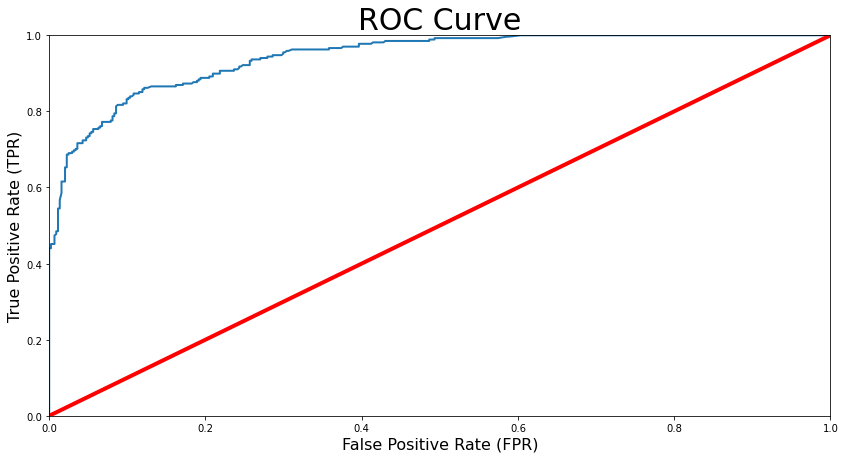

In [40]:
#ROC Curve

# getting the probabilities of our predictions
y_scores1 = random_forest.predict_proba(X_train_new)
y_scores1 = y_scores1[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_new, y_scores1)

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.title('ROC Curve', fontsize=30)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [41]:
#ROC AUC Score
r_a_score = roc_auc_score(y_train_new, y_scores1)
print("ROC-AUC-Score:", r_a_score)


ROC-AUC-Score: 0.9433911523463763


In [43]:
#Comparing results to Dummy Regression

# Create a dummy regressor with strategy as mean
sb = DummyClassifier(strategy="most_frequent")
sb.fit(X_train_new, y_train_new)

y_predsb = sb.predict(X_test_new)

# Create a dummy regressor with strategy as constant
sbc = DummyClassifier(strategy='constant', constant=1)

# Train and evaluate dummy regressor
sbc.fit(X_train_new, y_train_new)

y_predsbc = sbc.predict(X_test_new)

In [47]:
#Results of Gradient Boosting Regressor model in comparison with the baseline model
results_final = pd.DataFrame({   'Models': ['Random Forest', 'Baseline Model - most_frequent', 'Baseline Model - Constant'], 
    'r^2 Score - Training': [random_forest.score(X_train_new, y_train_new), sb.score(X_train_new, y_train_new), sbc.score(X_train_new, y_train_new)],
    'r^2 Score - Test' : [test_data_accuracyRF, accuracy_score(y_test_new, y_predsb), accuracy_score(y_test_new, y_predsbc)]})

results_final = results_final.set_index('Models')
results_final.head()

,r^2 Score - Training,r^2 Score - Test
Models,,
Random Forest,0.869382,0.826816
Baseline Model - most_frequent,0.623596,0.586592
Baseline Model - Constant,0.376404,0.413408


# Getting test set predictions

In [45]:
test_pred = random_forest.predict(test_data_final)

# Preparing output to CSV file

In [48]:
#Preparing output for test set predictions to CSV file
result = pd.DataFrame(testdf['PassengerId'])

#Appending the Survived data
result.insert(1, "Survived", test_pred, True)
result["Survived"] = pd.to_numeric(result["Survived"], downcast="integer")
print(result.head(10))

#Saving output as csv file
result.to_csv("Zheng Yimin_titanic results.csv", index=False)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0
